/tmp/ipykernel_2795836/3838747268.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_his["date"] = pd.to_datetime(df_his["date"])


            Unnamed: 0   symbol        open        high         low  \
date                                                                  
1985-10-01           0  [NQ100]  110.620003  112.160004  110.565002   
1985-10-02           1  [NQ100]  112.139999  112.540001  110.779999   
1985-10-03           2  [NQ100]  110.839996  111.184998  110.120003   
1985-10-04           3  [NQ100]  110.870003  110.870003  109.855003   
1985-10-07           4  [NQ100]  110.074997  110.135002  108.175003   
1985-10-08           5  [NQ100]  108.199997  108.269997  106.750000   
1985-10-09           6  [NQ100]  107.160004  108.989998  107.114998   
1985-10-10           7  [NQ100]  108.629997  109.510002  107.809998   
1985-10-11           8  [NQ100]  109.434998  111.120003  109.425003   
1985-10-14           9  [NQ100]  111.050003  113.269997  111.050003   

                 close     volume    adjclose ticker type  id  dividends  \
date                                                                   

/home/aiubuntu01/anaconda3/envs/py3.8-news/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/aiubuntu01/anaconda3/envs/py3.8-news/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/aiubuntu01/anaconda3/envs/py3.8-news/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/aiubuntu01/anaconda3/envs/py3.8-news/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/aiubuntu01/anaconda3/envs/py3.8-news/lib/python3.11/site-packages/sklearn/utils/validation.py:2749

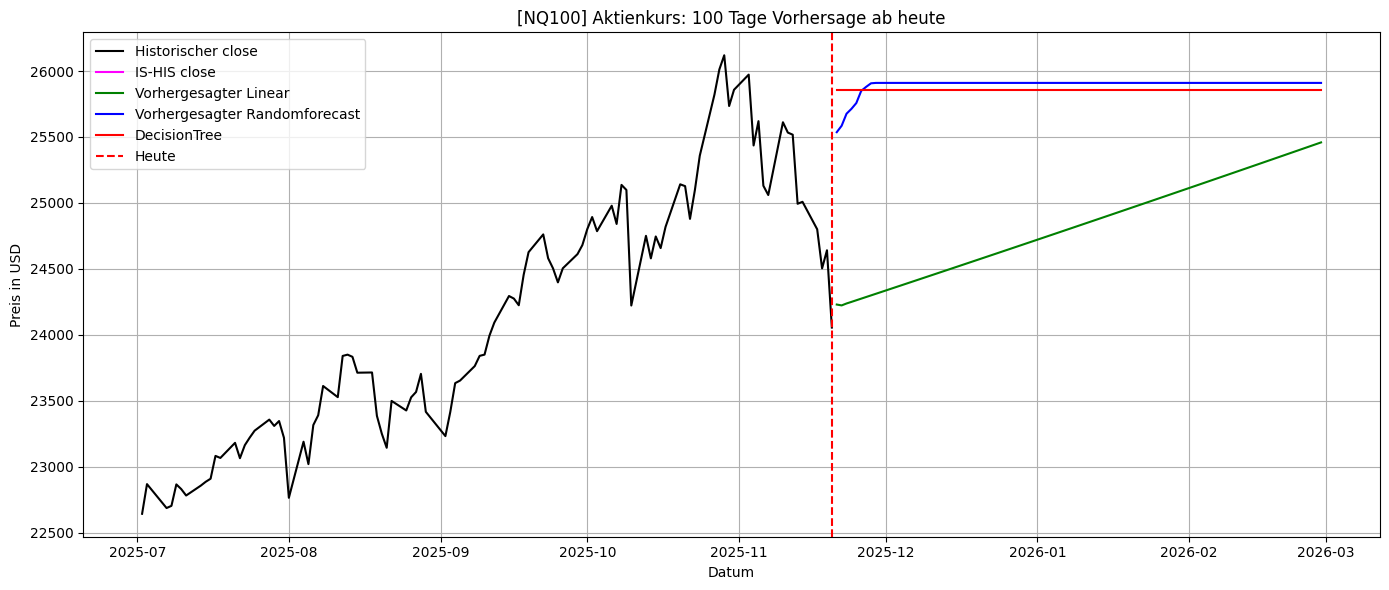

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestRegressor
#import matplotlib.pyplot as plt
#folderPath_His = "D:\\OneDrive\\AI Workspace\\data\\economics\\eco_symbols\\"
folderPath_His = "/Users/Shared/ai_work/Trainingdata/ml_data/yh_his/D1/"
stock_symbol = '#PLTR'
df = pd.read_csv (folderPath_His + stock_symbol + ".csv")
# Daten laden
#df = yf.download("TSLA", start="2018-01-01", end=None)

# Dow Theorie: Trendanalyse
def dow_theory(data):
    # Identifikation von Aufwärtstrends und Abwärtstrends (basiert auf Schlusskursen)
    data['Trend'] = np.where(data['close'] > data['close'].shift(1), '1', '0')
    return data


lastBars = 0
n_tail = 0
#n_tail = 400
df_his = df.tail(lastBars+1)
df_his["date"] = pd.to_datetime(df_his["date"]) 


#df = df[['date','open', 'high', 'low', 'close','volume','AUDUSD_close','F_TNote_10Y_close','F_TNote_10Y_volume','cot_noncom_long','cot_com_short','cot_noncom_short','cot_openinterest','F_TYield_13W_close','F_US_TBond_close','F_US_TBond_volume','F_VIX_close','F_USDX_close']]


df2 = df[['date', 'open', 'high', 'low', 'close', 'volume']]

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df[:len(df) - lastBars]
if n_tail > 0: df = df.tail(n_tail)

# Target-Spalte (1 Tag in der Zukunft)
df['Target'] = df['close'].shift(-1)
df = dow_theory(df)
print (df.head(10))
df.dropna(inplace=True)

# Modell trainieren
features = ['open', 'high', 'low', 'close', 'volume']
X = df[features]
y = df['Target']

model = LinearRegression()
model.fit(X, y)

#lr_preds = lr_model.predict(X_test_scaled)

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

# Letzten bekannten Tag als Ausgangspunkt für die Vorhersage
last_known = df.iloc[-1][features].copy()
future_predictions = []
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=100)



# Elliott Wellen Theorie: Eine einfache Methode zur Identifikation von Wellen
def elliott_wave(data):
    # Berechnung der Rückgänge und Anstiege (ein rudimentäres Beispiel)
    data['Wave_Up'] = np.where(data['close'] > data['close'].shift(1), 1, 0)
    data['Wave_Down'] = np.where(data['close'] < data['close'].shift(1), 1, 0)
    
    # Identifikation von Wellen (dies ist ein vereinfachtes Beispiel)
    data['Wave_Count'] = data['Wave_Up'].cumsum() - data['Wave_Down'].cumsum()
    return data

# Autoregressive 100-Tage-Vorhersage
for i in range(100):
    # Neue Vorhersage
    prediction = model.predict([last_known])[0]
    future_predictions.append(prediction)
    
    # Für den nächsten Tag simulieren wir neue Zeile (künstlich)
    new_row = last_known.copy()
    new_row['open'] = last_known['close']
    new_row['high'] = max(last_known['close'], prediction)
    new_row['low'] = min(last_known['close'], prediction)
    new_row['close'] = prediction
    new_row['volume'] = last_known['volume']  # optional gleich halten
    
    last_known = new_row

future_predictions_rf = []
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=100)

# Autoregressive 100-Tage-Vorhersage
for i in range(100):
    # Neue Vorhersage
    prediction = model_rf.predict([last_known])[0]
    future_predictions_rf.append(prediction)
    
    # Für den nächsten Tag simulieren wir neue Zeile (künstlich)
    new_row = last_known.copy()
    new_row['open'] = last_known['close']
    new_row['high'] = max(last_known['close'], prediction)
    new_row['low'] = min(last_known['close'], prediction)
    new_row['close'] = prediction
    new_row['volume'] = last_known['volume']  # optional gleich halten
    
    last_known = new_row

# Decision Tree: Vorhersage für den nächsten Tag 
from sklearn.tree import DecisionTreeRegressor
model_dc = DecisionTreeRegressor(random_state=42)
model_dc.fit(X, y)

future_predictions_dc = []
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=100)

# Autoregressive 100-Tage-Vorhersage
for i in range(100):
    # Neue Vorhersage
    prediction = model_dc.predict([last_known])[0]
    future_predictions_dc.append(prediction)
    
    # Für den nächsten Tag simulieren wir neue Zeile (künstlich)
    new_row = last_known.copy()
    new_row['open'] = last_known['close']
    new_row['high'] = max(last_known['close'], prediction)
    new_row['low'] = min(last_known['close'], prediction)
    new_row['close'] = prediction
    new_row['volume'] = last_known['volume']  # optional gleich halten
    
    last_known = new_row


# Plotten
plt.figure(figsize=(14, 6))
plt.plot(df.index[-100:], df['close'].iloc[-100:], label='Historischer close', color='black')

plt.plot(df_his['date'], df_his['close'], label='IS-HIS close', color='magenta')
plt.plot(future_dates, future_predictions, label='Vorhergesagter Linear ', color='green')
plt.plot(future_dates, future_predictions_rf, label='Vorhergesagter Randomforecast', color='blue')
plt.plot(future_dates, future_predictions_dc, label='DecisionTree', color='red')

plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Heute')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.title( stock_symbol + ' Aktienkurs: 100 Tage Vorhersage ab heute')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


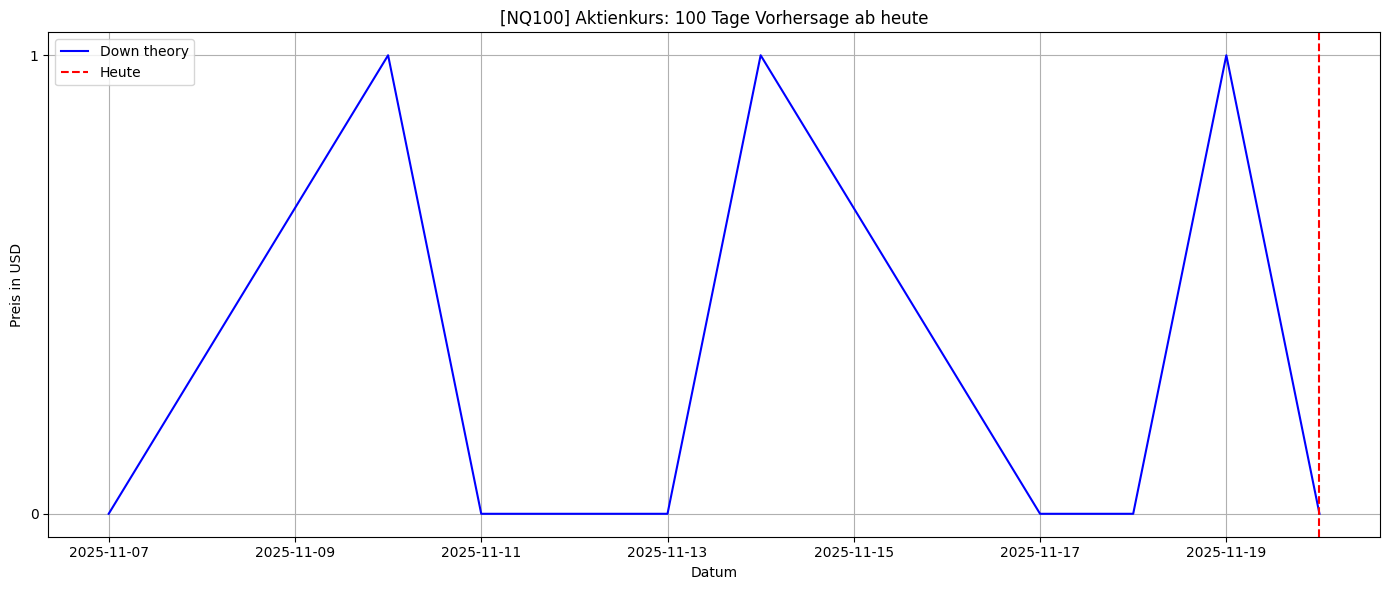

In [ ]:
# Plotten
plt.figure(figsize=(14, 6))
#plt.plot(df.index[-100:], df['close'].iloc[-100:], label='Historischer close', color='black')
plt.plot(df.index[-10:], df['Trend'].iloc[-10:], label='Down theory', color='blue')
#plt.plot(df_his['date'], df_his['close'], label='IS-HIS close', color='magenta')

plt.axvline(x=df.index[-1], color='red', linestyle='--', label='Heute')
plt.xlabel('Datum')
plt.ylabel('Preis in USD')
plt.title( stock_symbol + ' Aktienkurs: 100 Tage Vorhersage ab heute')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()